   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Clustered data saved to iris_clustered.csv


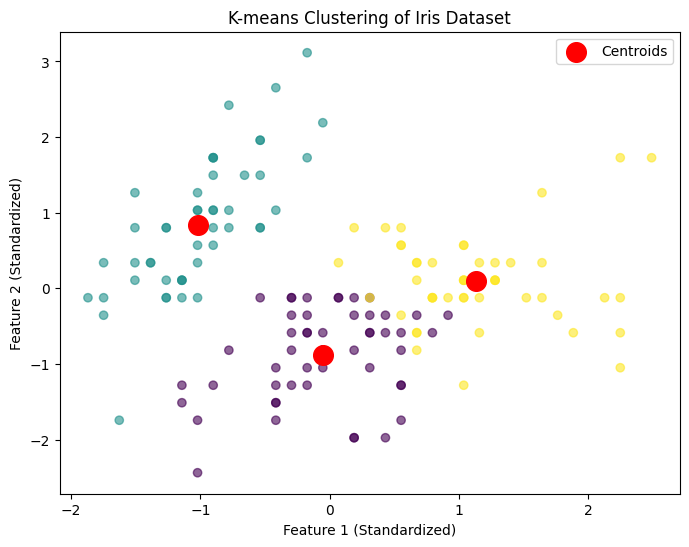

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = "C:\\Users\\Musakalim Khan\\Downloads\\iris.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Select features for clustering (excluding the last column if it's a label)
features = df.iloc[:, :-1].values  

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(features_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Save the clustered dataset
output_path = "iris_clustered.csv"
df.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")

# Visualize the clusters using the first two features
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()
